<a href="https://colab.research.google.com/github/valmyr/CIRCUITOS-I/blob/main/Exerc_02_circuitos_i_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

fatal: destination path 'ElectricCircuits' already exists and is not an empty directory.


In [ ]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart

In [ ]:
sp.init_printing()
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)


In [ ]:
matricula = [1,1,0]

R1 = 2*(matricula[0]+1)
R1

In [ ]:
matricula[0]

In [ ]:
I1,IL,IC,Vx,Vx_,Vx__,Vc_,Vc__,V1,V2,s,t = sp.symbols('I_1,I_L,I_C,V_x,Vx_,V_x_,V_c_,V__c_,V_1,V_2,s,t')

I1 = (V1 - s*Vx)/(0.5*(s**2))
IL = Vx/(2*R1+0.5*s)
IC = (s*Vx-V2)/4000

In [ ]:
Eq = sp.Eq(I1,IL+IC)

In [ ]:
#Contribuição de V1
sol = sp.solve(Eq.subs({V1:20,V2:0}),Vx,dict=True)[0]
Vx_ = sol[Vx]
IL_ = IL.subs({Vx:Vx_})
Vc_ = (IC*(4000/s)).subs({Vx:Vx_,V1:20,V2:0}).simplify()

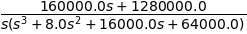

In [ ]:
Vc_

In [ ]:
#Contribuição de V2
sol = sp.solve(Eq.subs({V1:0,V2:10}),Vx,dict=True)[0]
Vx__ = sol[Vx]
IL__ = IL.subs({Vx:Vx__,V1:0,V2:10}).simplify()
Vc__ = (IC*(4000/s)).subs({Vx:Vx__,V1:0,V2:10}).simplify()

In [ ]:
symdisp("Vx_{'}(s) = ",Vx_,'Vs')
symdisp("Vx_{''}(s) = ",Vx__,'Vs')
symdisp('Vx(s) = ',(Vx__+Vx_).simplify(),'Vs')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

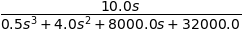

In [ ]:
IL__


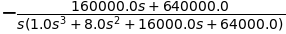

In [ ]:
Vc__

In [ ]:
#Assim Vc = Vc_+Vc__ é IL = IL_+IL__
VC = (Vc_ + Vc__).simplify()
IL = (IL_+IL__).simplify()

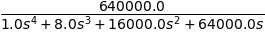

In [ ]:
VC.cancel()

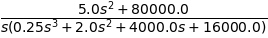

In [ ]:
IL

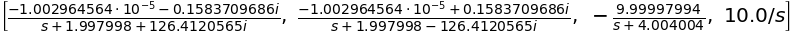

In [ ]:
VC_frac = partFrac(VC,10).as_ordered_terms()
VC_frac

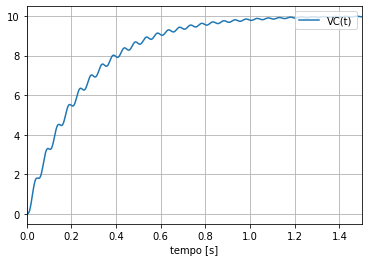

In [ ]:
vc = 0
for i in range(len(VC_frac)):
    vc += invL(VC_frac[i],s,t)
vc = vc.simplify()
symplot(t,vc,np.arange(0,1.5,.0001),'VC(t)')

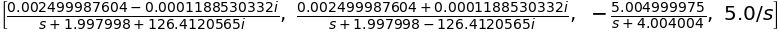

In [ ]:
IL_frac = partFrac(IL,10).as_ordered_terms()
IL_frac

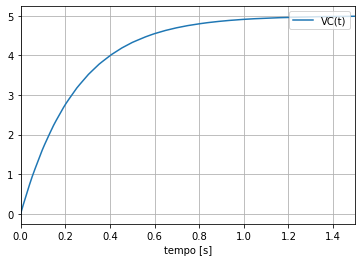

In [ ]:
iL = 0
for i in range(len(IL_frac)):
    iL += invL(IL_frac[i],s,t)
iL = iL.simplify()
symplot(t,iL,np.arange(0,1.5,.0001),'VC(t)')

In [ ]:
iL